## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.

В исследовании необходимо изучить рынок российского кинопроката и выявить текущие тренды, уделив особое внимание фильмам, которые получили государственную поддержку. Нужно определить, насколько такие фильмы интересны зрителю.

Данные взяты на портале открытых данных Министерства культуры, а также с сайта КиноПоиск.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

In [1]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df_movies = pd.read_csv('/datasets/mkrf_movies.csv')
df_shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [3]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Для того чтобы объединить датафреймы по столбцу "puNumber", нужно в первом датафрейме поменять тип данного столбца на int64.

In [5]:
df_movies = df_movies.replace('нет', '0')
df_movies['puNumber'] = df_movies['puNumber'].astype('int64')
data = df_movies.merge(df_shows, on='puNumber', how='left')

Проведем анализ получившегося датафрейма.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Датафреймы успешно объединены. В столбце `puNumber` остались все строки из первого датафрейма, а в столбец `box_office` вошли все строки из второго датафрейма.

Всего в датафрейме 16 столбцов:
* `title` — название фильма;
* `puNumber` — номер прокатного удостоверения;
* `show_start_date` — дата премьеры фильма;
* `type` — тип фильма;
* `film_studio` — студия-производитель;
* `production_country` — страна-производитель;
* `director` — режиссёр;
* `producer` — продюсер;
* `age_restriction` — возрастная категория;
* `refundable_support` — объём возвратных средств государственной поддержки;
* `nonrefundable_support` — объём невозвратных средств государственной поддержки;
* `financing_source` — источник государственного финансирования;
* `budget` — общий бюджет фильма;
* `ratings` — рейтинг фильма на КиноПоиске;
* `genres` — жанр фильма;
* `box_office` — сборы в рублях.

В столбцах `film_studio`, `production_country` и `director` присутствуют незначительные пропуски. Можно отбросить строки, в которых присутствуют пропуски по этим столбцам. 

В некоторых других столбцах пропуски более существенны, поэтому отбросить строки с пропусками в них не удасться. Необходимо будет рассмотреть варианты заполнения пропусков.

#### Вывод

Таким образом, на данном этапе были объединены два датафрейма в один, а также намечены планы по устранию пропусков в различных столбцах.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [8]:
data.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.00
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


Необходимо внести следующие коррективы:
* заменить тип данных столбца `show_start_date` на datetime;
* заменить тип данных столбца `ratings` на float64.

In [9]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

На Кинопоиске рейтинг исчисляется от 0 до 10, однако в данных есть строки, в которых рейтинг исчисляется в %. Необходимо привести их к единому стандарту.

In [10]:
data['ratings'] = data['ratings'].str.replace('%', '').astype(float)
data.loc[data['ratings'] >10, 'ratings'] = data.loc[data['ratings'] >10, 'ratings'] / 10

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [11]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Как говорилось ранее, доля пропусков в солбцах `film_studio`, `production_country` и `director` невелика, поэтому можно отбросить строки с пропусками в этих столбцах.

In [12]:
data = data[data['film_studio'].isna() == False]
data = data[data['production_country'].isna() == False]
data = data[data['director'].isna() == False]

Заполнение пропусков в остальных столбцах затруднительно, поскольку заполнение средними значениями в столбцах с численными даными может привести к значительным искажениям итоговых выводов. Можно заполнить пропуски нулевыми значениями, однако видимых преимуществ это не даст.

Похожая ситуация наблюдается со столбцами с уникальными значениями (например, имя продюсера). Можно заполнить пропуски значением "unknown", однако видимых преимущств это не даст.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [13]:
data[data.duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Явных дубликатов в данных не выявлено. Попробуем найти неявные дубликаты.

In [14]:
data['title'].value_counts()

День святого Валентина_                    5
Непокоренный.                              4
Дитя тьмы                                  4
Дом грёз                                   4
Жена путешественника во времени            4
                                          ..
Агент под прикрытием                       1
МУЛЬТ в кино. Выпуск №47                   1
Эколав                                     1
Страсти Дон Жуана                          1
Три метра над уровнем неба. Я тебя хочу    1
Name: title, Length: 6746, dtype: int64

Как можно видеть, в датафрейме есть фильмы с одним и тем же названием.

In [15]:
data[data['title'] == 'День святого Валентина_']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3902,День святого Валентина_,221083810,2010-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.70,"мелодрама,комедия",NaN
3991,День святого Валентина_,221068010,2010-05-14 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.70,"мелодрама,комедия",NaN
4070,День святого Валентина_,121002210,2010-02-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.70,"мелодрама,комедия",NaN
4196,День святого Валентина_,221136210,2010-11-30 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.70,"мелодрама,комедия",NaN
5070,День святого Валентина_,221066410,2010-06-01 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.70,"мелодрама,комедия",NaN


У данных фильмов одинаковые названия, но разные номера прокатного удостоверения и дата начала проката.

Однако может быть ситуация, когда фильмы имеют одинаковое названия, но сняты разными режиссерами и в разных странах, что нужно учесть при удалении дубликатов.

In [16]:
duplicated_films = data[['title', 'production_country', 'director']]
duplicated_films = duplicated_films[duplicated_films.duplicated()]
duplicated_films['title'].count()

675

Получается, в датафрейме 675 фильмов с одинаковым названием, страной происхожения и режисером.

In [17]:
duplicated_films[duplicated_films['title'] == 'День святого Валентина_']

,title,production_country,director
3991,День святого Валентина_,США,Гарри Маршалл
4070,День святого Валентина_,США,Гарри Маршалл
4196,День святого Валентина_,США,Гарри Маршалл
5070,День святого Валентина_,США,Гарри Маршалл


In [18]:
data = data.drop(index=duplicated_films.index.to_list())

In [19]:
data[data['title'] == 'День святого Валентина_']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3902,День святого Валентина_,221083810,2010-07-15 12:00:00+00:00,Художественный,"Уорнер Бразерс, Нью Лайн Синема, Уэйн Райс, Ка...",США,Гарри Маршалл,Сэмюэл Дж.Браун,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.70,"мелодрама,комедия",NaN


In [20]:
data[data['puNumber'].duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Дубликатов в столбце `puNumber` не обнаружено.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6784 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  6784 non-null   object             
 1   puNumber               6784 non-null   int64              
 2   show_start_date        6784 non-null   datetime64[ns, UTC]
 3   type                   6784 non-null   object             
 4   film_studio            6784 non-null   object             
 5   production_country     6784 non-null   object             
 6   director               6784 non-null   object             
 7   producer               6229 non-null   object             
 8   age_restriction        6784 non-null   object             
 9   refundable_support     331 non-null    float64            
 10  nonrefundable_support  331 non-null    float64            
 11  budget                 331 non-null    float64          

Категориальные значения присутсвуют в столбцах `type` и `age_restriction`. 

В теории, к категориальным столбцам также можно отнести `film_studio`, `production_country`, `director`, `producer`, `financing_source` и `genres`, однако разнообразие данных в них не позволяет провести категоризацию. (Например, фильмы могут сниматься в конечном множестве стран. Однако фильмы, снятые в СССР, будут отнесены к одной категории, а фильмы, снятые в СССР и Франции - к другой)

In [22]:
data['type'].value_counts()

Художественный                3924
 Художественный               1374
Анимационный                   770
Прочие                         389
Документальный                 276
Научно-популярный               49
Музыкально-развлекательный       1
 Анимационный                    1
Name: type, dtype: int64

In [23]:
data['production_country'].value_counts()

Россия                                                               1788
США                                                                  1782
СССР                                                                  345
Франция                                                               278
Великобритания                                                        237
                                                                     ... 
Австралия-Турция-США                                                    1
Ирландия - Финляндия - Бельгия - Великобритания - США - Швейцария       1
Великобритания-США-Германия-КНР                                         1
Германия - Бельгия - Люксембург - Норвегия                              1
США - Япония - Франция - Великобритания                                 1
Name: production_country, Length: 950, dtype: int64

In [24]:
data['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2518
«12+» - для детей старше 12 лет           1484
«18+» - запрещено для детей               1439
«0+» - для любой зрительской аудитории     741
«6+» - для детей старше 6 лет              602
Name: age_restriction, dtype: int64

В столбце `type` выявлены дубликаты, связанные с пробелами.

In [25]:
data['type'] = data['type'].str.strip()
data['type'].value_counts()

Художественный                5298
Анимационный                   771
Прочие                         389
Документальный                 276
Научно-популярный               49
Музыкально-развлекательный       1
Name: type, dtype: int64

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6784 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  6784 non-null   object             
 1   puNumber               6784 non-null   int64              
 2   show_start_date        6784 non-null   datetime64[ns, UTC]
 3   type                   6784 non-null   object             
 4   film_studio            6784 non-null   object             
 5   production_country     6784 non-null   object             
 6   director               6784 non-null   object             
 7   producer               6229 non-null   object             
 8   age_restriction        6784 non-null   object             
 9   refundable_support     331 non-null    float64            
 10  nonrefundable_support  331 non-null    float64            
 11  budget                 331 non-null    float64          

Количественные значения присутствуют в столбцах `refundable_support`, `nonrefundable_support`, `budget`, `ratings`.

In [27]:
data[['refundable_support', 'nonrefundable_support', 'budget', 'ratings']].describe().round()

,refundable_support,nonrefundable_support,budget,ratings
count,331.00,331.00,331.00,5843.00
mean,11900302.00,49038333.00,127469081.00,6.00
std,24945705.00,60061813.00,188823341.00,1.00
min,0.00,0.00,0.00,1.00
25%,0.00,25000000.00,42000000.00,6.00
50%,0.00,30000000.00,68809226.00,7.00
75%,15000000.00,40750000.00,143945639.00,7.00
max,180000000.00,400000000.00,2305074303.00,10.00


Бюджет фильма вряд ли может быть равен нулю.

In [28]:
data[data['budget'] == 0].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,0.00,Фонд кино,6.60,драма,446163511.00
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,0.00,Фонд кино,7.80,"боевик,драма,криминал",196572438.40
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,0.00,Фонд кино,6.20,"комедия,фэнтези",67418974.80
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551.40


Несмотря на то, что бюджет фильма равен нулю, для него указана стоимость возвратных и невозвратных средств. Поэтому в фильмах с нулевым бюджетом можно заполнить пропуски с помощью суммирования двух источников.

In [29]:
data.loc[data['budget'] == 0, 'budget'] = data.loc[data['budget'] == 0, 'refundable_support'] + data.loc[data['budget'] == 0, 'nonrefundable_support']

Рассмотрим распределение данных в столбцах с количественными значениями:

In [30]:
pd.options.display.float_format = '{:.2f}'.format
data[['refundable_support', 'nonrefundable_support', 'budget', 'ratings', 'box_office']].describe().round()

,refundable_support,nonrefundable_support,budget,ratings,box_office
count,331.00,331.00,331.00,5843.00,3024.00
mean,11900302.00,49038333.00,131674427.00,6.00,75467542.00
std,24945705.00,60061813.00,187375150.00,1.00,237450465.00
min,0.00,0.00,6000000.00,1.00,0.00
25%,0.00,25000000.00,45510944.00,6.00,121933.00
50%,0.00,30000000.00,71517631.00,7.00,2429184.00
75%,15000000.00,40750000.00,150000000.00,7.00,23641347.00
max,180000000.00,400000000.00,2305074303.00,10.00,3073568691.00


На диаграммах видно, что большая их часть смещена влево. Это означает, что в данных присутствует существенное количество выбросов, из-за чего диаграммы имеют большой "хвост".

<AxesSubplot:>

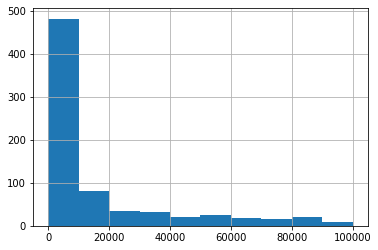

In [31]:
data['box_office'].hist(bins=10, range=(0, 100000))

Большое количество фильмов имеют кассовые сборы менее 20000 рублей. Вероятно, в этих данных присутсвует ошибка. Однако попытка удалить эти фильмы пожет привести к потере большого количества информации. Напомню, в столбце `box_office` заполнено только 3024 строки, а удалить нужно примерно 560 (18,51%).

<AxesSubplot:>

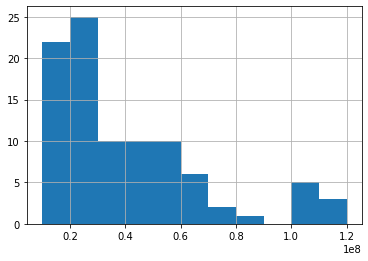

In [32]:
data['refundable_support'].hist(bins=11, range=(10000000, 120000000))

Также можно видеть, что в данных возвратной после 95 000 000 рублей наблюдается "всплеск". 

In [33]:
data[data['refundable_support']> 95000000]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3164,Герой (2015),111000416,2016-01-22 12:00:00+00:00,Художественный,"ООО ""Студия 25"", ООО ""Медиа Арт Студио"", ООО ...",Россия,Ю.Васильев,"Э.Айнулова, Н.Дорошкевич, М.Журомская",«12+» - для детей старше 12 лет,110000000.00,30000000.00,222177790.00,"Министерство культуры, Фонд кино",7.10,"мюзикл,боевик,драма",81430626.82
3351,Дуэлянт,111015416,2016-09-14 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,А.Мизгирев,"А.Роднянский, С.Мелькумов",«16+» - для детей старше 16 лет,150000000.00,300000000.00,684200536.00,Фонд кино,6.60,драма,364285139.60
3453,Ледокол,111016316,2016-10-11 12:00:00+00:00,Художественный,"ООО ""Продюсерская фирма Игоря Толстунова""",Россия,Н.Хомерики,"И.Толстунов, С.Козлов",«12+» - для детей старше 12 лет,100000000.00,200000000.00,430000000.00,Фонд кино,6.50,драма,337069662.80
5437,Матильда,111005717,2017-08-17 12:00:00+00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+» - для детей старше 16 лет,110000000.00,190000000.00,1032905957.00,Фонд кино,7.70,"фэнтези,комедия,семейный",511775548.00
5569,Легенда о Коловрате,111007617,2017-11-30 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ИВАН""",Россия,И.Шурховецкий,"ООО ""Централ Партнершип"", АО ""Тел...",«12+» - для детей старше 12 лет,100000000.00,250000000.00,500012729.00,Фонд кино,6.40,"история,боевик,фэнтези",590405065.00
6472,Три богатыря и наследница престола,114008818,2018-12-15 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,К.Бронзит,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,115000000.00,0.00,185500705.00,Фонд кино,6.50,"мультфильм,приключения,семейный",577368853.25
7114,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180000000.00,90000000.00,2305074303.00,Фонд кино,5.80,"приключения,фэнтези",333597059.59
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.00,400000000.00,980000000.00,Фонд кино,6.00,"история,биография,драма",717703185.53
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.00,0.00,190000000.00,Фонд кино,6.70,"мультфильм,приключения,семейный",501069235.00
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.00,400000000.00,944000000.00,Фонд кино,5.70,"фантастика,боевик",NaN


Как можно видеть, это одни из самых известных фильмов, спонсированных государсвом. Удалять их также не стоит, поскольку они существенны. 

<AxesSubplot:>

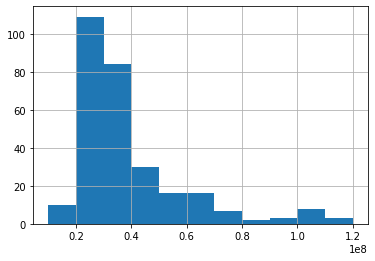

In [34]:
data['nonrefundable_support'].hist(bins=11, range=(10000000, 120000000))

Распределение данных о безвозмездной поддержке уже больше похоже на нормальное, однако наблюдается всплеск после 90 000 000 рублей.

In [35]:
data[data['refundable_support']> 90000000]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3164,Герой (2015),111000416,2016-01-22 12:00:00+00:00,Художественный,"ООО ""Студия 25"", ООО ""Медиа Арт Студио"", ООО ...",Россия,Ю.Васильев,"Э.Айнулова, Н.Дорошкевич, М.Журомская",«12+» - для детей старше 12 лет,110000000.00,30000000.00,222177790.00,"Министерство культуры, Фонд кино",7.10,"мюзикл,боевик,драма",81430626.82
3351,Дуэлянт,111015416,2016-09-14 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,А.Мизгирев,"А.Роднянский, С.Мелькумов",«16+» - для детей старше 16 лет,150000000.00,300000000.00,684200536.00,Фонд кино,6.60,драма,364285139.60
3453,Ледокол,111016316,2016-10-11 12:00:00+00:00,Художественный,"ООО ""Продюсерская фирма Игоря Толстунова""",Россия,Н.Хомерики,"И.Толстунов, С.Козлов",«12+» - для детей старше 12 лет,100000000.00,200000000.00,430000000.00,Фонд кино,6.50,драма,337069662.80
5437,Матильда,111005717,2017-08-17 12:00:00+00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+» - для детей старше 16 лет,110000000.00,190000000.00,1032905957.00,Фонд кино,7.70,"фэнтези,комедия,семейный",511775548.00
5569,Легенда о Коловрате,111007617,2017-11-30 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ИВАН""",Россия,И.Шурховецкий,"ООО ""Централ Партнершип"", АО ""Тел...",«12+» - для детей старше 12 лет,100000000.00,250000000.00,500012729.00,Фонд кино,6.40,"история,боевик,фэнтези",590405065.00
6472,Три богатыря и наследница престола,114008818,2018-12-15 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,К.Бронзит,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,115000000.00,0.00,185500705.00,Фонд кино,6.50,"мультфильм,приключения,семейный",577368853.25
7114,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180000000.00,90000000.00,2305074303.00,Фонд кино,5.80,"приключения,фэнтези",333597059.59
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.00,400000000.00,980000000.00,Фонд кино,6.00,"история,биография,драма",717703185.53
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.00,0.00,190000000.00,Фонд кино,6.70,"мультфильм,приключения,семейный",501069235.00
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.00,400000000.00,944000000.00,Фонд кино,5.70,"фантастика,боевик",NaN


Это те же самые известные фильмы, спонсированные государством. 

<AxesSubplot:>

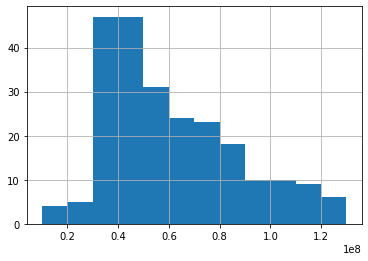

In [36]:
data['budget'].hist(bins=12, range=(10000000, 130000000))

Данные о бюджете фильмов не имеют всплесков, однако их распределение явлеется правоассиметричным.

<AxesSubplot:>

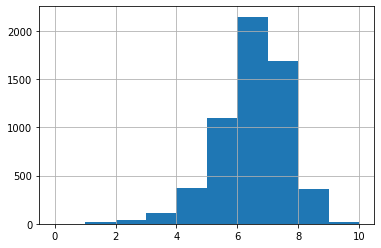

In [37]:
data['ratings'].hist(bins=10, range=(0, 10))

Лучше всего ситуация обстоит с распределением рейтинга на Кинопоские. Оно приближено к нормальному, однако имеет небольшую левоассиметричность.

Таким образом, большая часть данных искажается "фильмами-выбросами".  Их удаление может существенно снизить результативность исследования, поэтому в качестве критериев для сравнения фильмов необходимо использовать медианные значения, а не средние.

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [38]:
data['year'] = data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [39]:
def find_main(string):
    try:
        return string.split(',')[0]
    except:
        return

In [40]:
data['main_director'] = data['director'].apply(find_main)
data['main_genre'] = data['genres'].apply(find_main)

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [41]:
data['gov_share'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

#### Вывод

Таким образом, на данно этапе были проверены типы данных в датафрейме, заполнены пропуски и удалены дубликаты. Также были изучены столбцы с категориальными и количественными значениями, добавлены новые столбцы, необходимые для дальнейшего исследования. 

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [42]:
data_pivot = data.pivot_table(index='year', values = 'title', aggfunc = 'count').rename(columns = {'title': 'total_films'})
data_pivot1 = data.pivot_table(index='year', values = 'box_office', aggfunc = 'count').rename(columns = {'box_office': 'films_with_box_info'})

data_pivot = data_pivot.merge(data_pivot1, on='year', how='left')

data_pivot['info_share'] = round(data_pivot['films_with_box_info'] / data_pivot['total_films'], 2)

data_pivot

,total_films,films_with_box_info,info_share
year,,,
2010,757,88,0.12
2011,475,98,0.21
2012,516,115,0.22
2013,589,176,0.30
2014,729,257,0.35
2015,661,431,0.65
2016,770,500,0.65
2017,500,357,0.71
2018,873,473,0.54


<AxesSubplot:xlabel='year'>

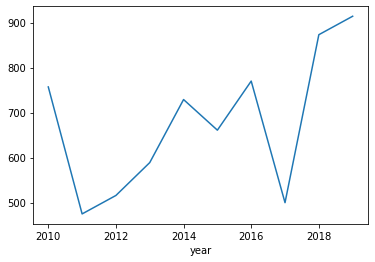

In [43]:
data_pivot['total_films'].plot()

C 2010 по 2017 наблюдается рост численности фильмов с информацией о кассовых сборах, однако затем доля фильмов с информацией падает. Наиболее полная информация представлена по 2017 году. 

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

,total_box
year,
2010,2374.00
2011,13944.00
2012,6421.00
2013,29769.00
2014,7372599.00
2015,32084650.00
2016,43731250.00
2017,48563707.00
2018,47985682.00


<AxesSubplot:xlabel='year'>

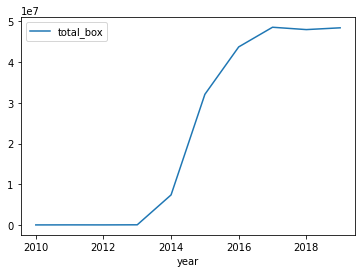

In [44]:
data_pivot = data.pivot_table(index='year', values = 'box_office', aggfunc = 'sum').rename(columns = {'box_office': 'total_box'})
data_pivot['total_box'] = round(data_pivot['total_box'] / 1000)
display(data_pivot)

data_pivot.plot()

Виндно, что с 2013 по 2017 происходит существенный рост кассовых сборов, а затем с 2017 года они стаются примерно на одном уровне.

В 2017 году сумма сборов была максимальной, а в 2010 - минимальной. 

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [45]:
def mod_function(number):
    return round(number / 1000)

In [46]:
data_pivot = data.pivot_table(index='year', values = 'box_office', aggfunc = ['sum', 'mean', 'median'])

data_pivot1 = pd.DataFrame()
data_pivot1['total_box'] = data_pivot['sum']['box_office'].apply(mod_function)
data_pivot1['mean_box'] = data_pivot['mean']['box_office'].apply(mod_function)
data_pivot1['median_box'] = data_pivot['median']['box_office'].apply(mod_function)

data_pivot1

,total_box,mean_box,median_box
year,,,
2010,2374,27,2
2011,13944,142,3
2012,6421,56,7
2013,29769,169,4
2014,7372599,28687,22
2015,32084650,74442,4327
2016,43731250,87463,3650
2017,48563707,136033,9968
2018,47985682,101450,8891


Из представленной таблицы видны, что динамика среднего значения кассовых сборов отличается от динамики общей суммы кассовых сборов и их медианного значения. Как уже говорилось ранее, средние значения существенно искажаются из-за "фильмов-выбросов" и ненормальности распределения данных. Медиана меньше подвержена данным искажениям, поэтому её использование позволит сделать более объективные выводы.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [47]:
data_pivot_total = data.pivot_table(index='year', values = 'box_office', aggfunc = 'median').rename(columns = {'box_office': 'Медианное значение сборов всех фильмов'})

for limit in list(data['age_restriction'].unique()):
    name = limit.split('-')[0].strip()
    data_pivot = data[data['age_restriction'] == limit].pivot_table(index='year', values = 'box_office', aggfunc = 'median').rename(columns = {'box_office': f'Медианное значение сборов для {name}'})
    #data_pivot1 = data.pivot_table(index='year', values = 'box_office', aggfunc = 'count').rename(columns = {'box_office': 'films_with_box_info'})

    data_pivot_total = data_pivot_total.merge(data_pivot, on='year', how='left')

data_pivot_total.sort_index(axis=1)

,Медианное значение сборов всех фильмов,Медианное значение сборов для «0+»,Медианное значение сборов для «12+»,Медианное значение сборов для «16+»,Медианное значение сборов для «18+»,Медианное значение сборов для «6+»
year,,,,,,
2010,1868.00,10980.00,2635.00,1000.00,1970.00,NaN
2011,3042.50,6220.00,4859.50,2835.00,520.00,NaN
2012,6655.00,18420.00,3685.00,1760.00,4077.50,8305.00
2013,3565.00,18470.00,2550.00,3880.00,1600.00,3370.00
2014,22490.00,195810.00,6037.50,16730.00,429992.00,113935.00
2015,4327265.70,2767310.60,15144119.40,4170454.50,4011143.20,20380982.20
2016,3650260.90,2804263.00,4690635.25,3659719.50,5667492.65,3698271.84
2017,9968340.00,22178956.00,9010548.00,9702077.00,8212677.00,51992103.00
2018,8891102.21,3616937.28,10035323.33,8751895.75,7179466.00,14688850.32


<AxesSubplot:xlabel='year'>

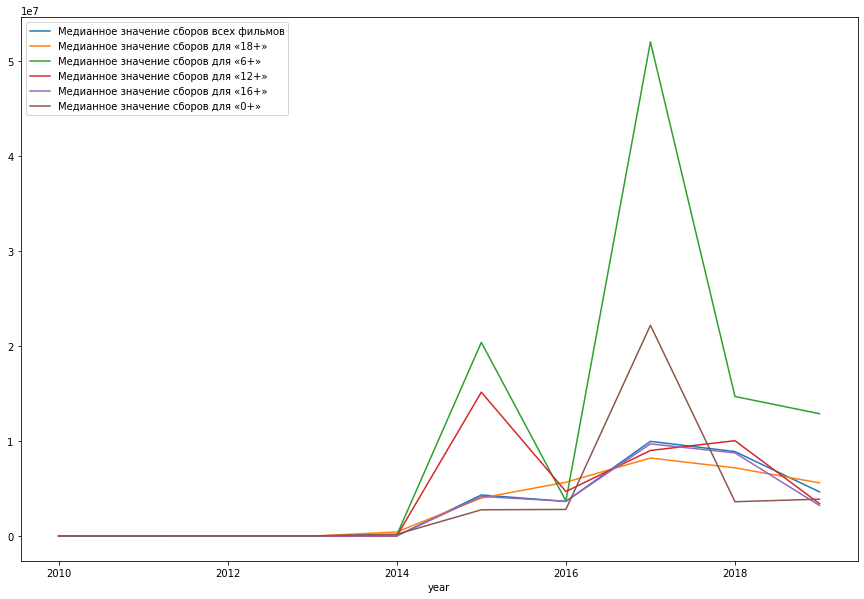

In [48]:
data_pivot_total.plot(figsize = (15, 10))

C 2010 по 2013 больше всего в прокате собирали фильмы "0+".

С 2014 по 2014, а затем с 2017 по 2019 больше всего в прокате собирали фильмы "6+".

В 2016 году больше всего в прокате собирали фильмы "18+".

В целом медианные кассовые сборы фильма с 2017 года начинают падать независимо от его возрастного ограничения.

Изменения в структуре медианных сборов фильмов, скорее всего, связаны с "фильмами-выбросами": в некоторые года выходили популярные фильмы, которые искажали данные.

#### Вывод

Таким образом, на данном этапе была изучена динамика выхода фильмов в зависимсоти от года, а также рассмотрены данные о прокате фильмов в кинотеатрах: их средние и медианные сборы, полнота информации, динамика проката и её зависимость от возрастного ограничения.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [49]:
data_pivot_gov = data[data['budget'] > 0].pivot_table(index='year', values=['budget', 'box_office','title', 'ratings'], aggfunc={'budget':'median', 'box_office':'median','title':'count', 'ratings':'median'})
#pivot_table_gov['box_office'] = pivot_table['box_office'].apply(mod_function)
#pivot_table_gov['budget'] = pivot_table['budget'].apply(mod_function)

data_pivot_nongov = data[(data['budget'].isna())&(data['year'] >= 2013)].pivot_table(index='year', values=['budget', 'box_office','title', 'ratings'], aggfunc={'box_office':'median','title':'count', 'ratings':'median'})
#pivot_table_nongov['box_office'] = pivot_table['box_office'].apply(mod_function)
#pivot_table_nongov['budget'] = pivot_table['budget'].apply(mod_function)

print('Фильмы с государственной поддержкой')
display(data_pivot_gov) 
print('\n')
print('Фильмы без государственной поддержки')
display(data_pivot_nongov)


Фильмы с государственной поддержкой


,box_office,budget,ratings,title
year,,,,
2013,10161192.55,127717695.00,6.70,2
2014,5504517.85,61036441.50,6.40,16
2015,9200824.50,57493985.50,6.20,86
2016,17921115.61,69883049.00,5.80,61
2017,50451949.00,78096315.00,6.20,41
2018,27023390.31,90324563.50,6.20,56
2019,27853374.23,78422212.00,6.20,69




Фильмы без государственной поддержки


,box_office,ratings,title
year,,,
2013,3547.50,6.60,587
2014,17050.00,6.70,713
2015,4268758.50,6.50,575
2016,3383683.59,6.60,709
2017,9487367.00,6.40,459
2018,8292672.00,6.50,817
2019,4211950.20,6.50,845


В течение рассматриваемого периода медианная оценка фильмов с государственной поддержкой составляла примерно 6.2, однако в 2016 году медианная оценка упала до 5.8. Больше всего выходило фильмов в прокат в 2015 году.

В течение всего рассматриваемого периода медианная оценка фильмов без гос. поддержки была выше фильмов с гос. поддержкой.

<AxesSubplot:xlabel='year'>

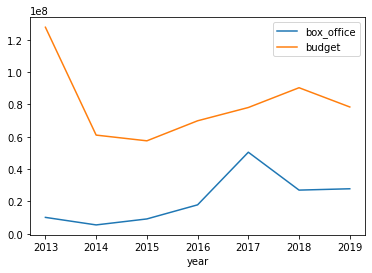

In [50]:
data_pivot_gov[['box_office', 'budget']].plot()

Медианные кассовые сборы фильмов с гос. поддержкой росли с 2014 по 2017, а затем резко упали в 2018. Медианный бюджет фильмов постепенно рос с 2014 по 2018, но в 2019 снизился. Также видно, что в среднем фильмы с гос. поддержкой не окупаются. 

/tmp/ipykernel_895/536927083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_table['is_successful'] = pivot_table['box_office'] > pivot_table['budget']


<AxesSubplot:xlabel='year'>

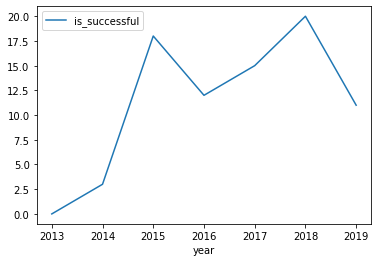

In [51]:
pivot_table = data[data['budget'] > 0]
pivot_table['is_successful'] = pivot_table['box_office'] > pivot_table['budget']
pivot_table = pivot_table.pivot_table(index='year', values='is_successful', aggfunc='sum')
pivot_table.plot()

Несмотря на общую закономерность, в среднем более 11 фильмов в год с государственной поддрежкой являются успешными с точки зрения кассовых сборов. Больше всего успешных фильмов в кассовом прокате выходило в 2018 и 2015 годах. 

<AxesSubplot:xlabel='year'>

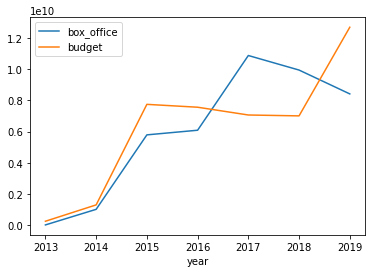

In [52]:
data[data['budget'] > 0].pivot_table(index='year', values=['budget', 'box_office'], aggfunc='sum').plot()

Тенденция изменения общей поддержки немного отличается от тенденции изменения бюджета фильма с гос. поддержкой: 


<AxesSubplot:xlabel='year'>

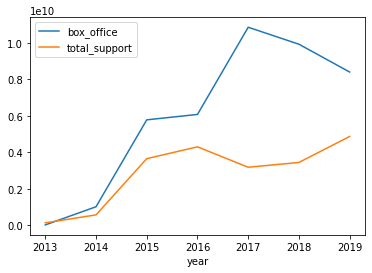

In [53]:
data_pivot = pd.DataFrame()
data_pivot = data[data['budget'] > 0][['year', 'box_office']]
data_pivot['total_support'] = data.loc[data['budget'] > 0, 'refundable_support'] + data.loc[data['budget'] > 0, 'nonrefundable_support']
data_pivot.pivot_table(index='year', values=['box_office', 'total_support'], aggfunc='sum').plot()

C 2013 по 2015 наблюдается рост объема выделенных бюджетных средств, затем он немного снижается с 2015 по 2018, а затем существено увеличивается в 2019.

Общие кассовые сборы фильмов с гос. поддержкой росли с 2013 по 2017, а затем начали снижаться. 

In [54]:
pivot_table = data[data['budget'] > 0].pivot_table(index='year', values=['refundable_support', 'nonrefundable_support'], aggfunc='sum')
pivot_table

,nonrefundable_support,refundable_support
year,,
2013,134347945.00,0.00
2014,501002299.00,71000000.00
2015,3019088340.00,637153119.00
2016,3381655482.00,921500000.00
2017,2464624781.00,719346881.00
2018,2784969465.00,662000000.00
2019,3946000000.00,928000000.00


<AxesSubplot:xlabel='year'>

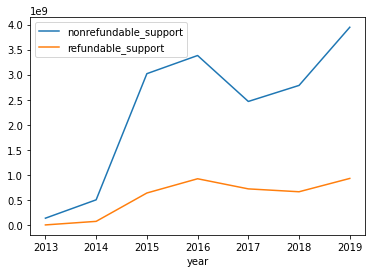

In [55]:
pivot_table.plot()

На представленном графике видно, что государство больше всего выделяет невозвратных средств. Их объем резко вырос с 2013 по 2016, затем уменьшился в 2017 и снова начал расти. 

Объем выделеных возвратных средств рос с 2013 по 2016, затем с 2016 по 2018 уменьшалса, а в 2019 снова начал расти. 

In [56]:
data[data['budget'] > 0]['main_genre'].value_counts().head(10)

драма         93
комедия       74
мультфильм    31
триллер       15
мелодрама     15
фантастика    11
фэнтези       10
ужасы         10
военный        9
семейный       7
Name: main_genre, dtype: int64

За рассматриваемый период больше всего государство выделило денег на драматические фильмы, чуть меньше на комедии, ещё меньше на мультфильмы и прочие жанры.

In [57]:
data[data['budget'] > 0]['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           124
«12+» - для детей старше 12 лет           106
«6+» - для детей старше 6 лет              65
«18+» - запрещено для детей                28
«0+» - для любой зрительской аудитории      8
Name: age_restriction, dtype: int64

В течение рассматриваемого периода государство больше всего выделяло деньги на фильмы 16+ и чуть меньше на 12+. 

In [58]:
data[data['budget'] > 0]['main_director'].value_counts().head()

Р.Давлетьяров    5
С.Андреасян      4
Д.Дьяченко       4
Д.Шмидт          3
А.Цицилин        3
Name: main_director, dtype: int64

Самыми популярными главными режисерами фильмов с государственной поддержкой являются Р.Давлетьяров, С.Андреасян, Д.Дьяченко, А.Аксененко и К.Шипенко.

<AxesSubplot:ylabel='financing_source'>

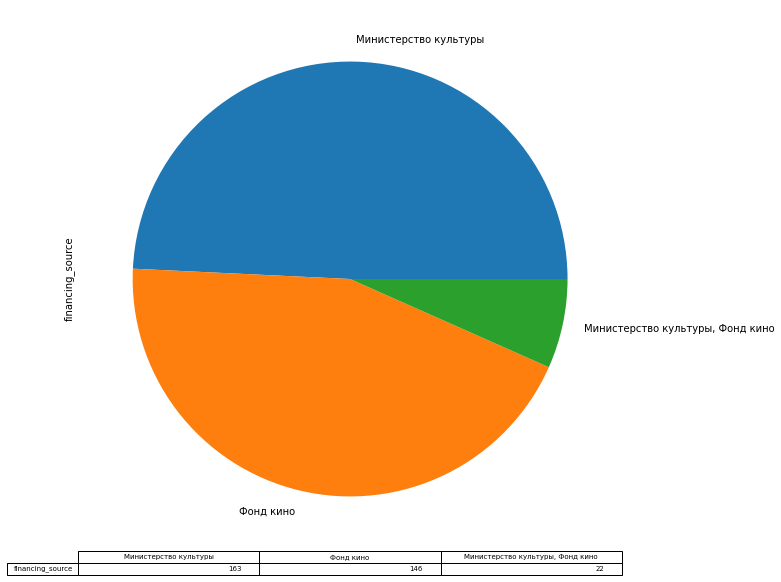

In [59]:
data[data['budget'] > 0]['financing_source'].value_counts().plot(kind='pie', table=True, figsize=(15,10))

Больше всего фильмов спонсируются Министерством культуры, чуть меньше фильмов спонсируются Фондом кино.

#### Вывод

Таким образом, на данном этапе был проведен поиск закономерностей в данных о фильмах с государственной поддержкой. Были изучены их общие и медианные сборы и бюджет, динамика успешности фильмов и их кассовых сборов, а также распределение возвратных и невозвратных средств. Кроме этого были рассмотрены жанры и возрастные ограничения фильмов с государственной поддержкой, их главные режиссёры и источник государственного финансирования. 

### Шаг 5. Напишите общий вывод

Опираясь на полученные результаты исследования, можно сделать следующие практически применимые выводы:
* В течение рассматриваемого периода медианная оценка фильмов с государственной поддержкой составляла примерно 6.2, однако в 2016 году медианная оценка упала до 5.8.
* Больше всего фильмов с государственной поддержкой выходило в прокат в 2015 году.
* В течение всего рассматриваемого периода медианная оценка фильмов без гос. поддержки была выше фильмов с гос. поддержкой.
* Медианные кассовые сборы фильмов с гос. поддержкой росли с 2014 по 2017, а затем резко упали в 2018. Медианный бюджет фильмов постепенно рос с 2014 по 2018, но в 2019 снизился.
* Большинство фильмов с гос. поддержкой не окупаются, однако более 11 фильмов в год являются успешными с точки зрения кассовых сборов. Больше всего успешных фильмов в кассовом прокате выходило в 2018 и 2015 годах.
* C 2013 по 2015 наблюдается рост объема выделенных бюджетных средств, затем он немного снижается с 2015 по 2018, а затем существено увеличивается в 2019.
* Общие кассовые сборы фильмов с гос. поддержкой росли с 2013 по 2017, а затем начали снижаться.
* В структуре выделенных бюджетных средств доминируют средства на невозвратной основе. Их объем резко вырос с 2013 по 2016, затем уменьшился в 2017 и снова начал расти.
* Объем выделеных возвратных средств рос с 2013 по 2016, затем с 2016 по 2018 уменьшался, а в 2019 снова начал расти.

В целом можно сказать, что фильмы с государственной поддержкой в среднем нравятся зрителю, однако чаще всего такие фильмы не являются коммерчески успешными. 